# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the NAWA dataset. They present indeed different time-resolutions so not necessarly daily and hourly, but in different campaings. 

The output is one file per catchemnt (similar to the CAMELS_CH), with 44 columns:

column_name_mapping = {
    "DOC": "doc(mg/l)",
    "Nitrat-Stickstoff": "nitrate_nitrogen(mgN/l)",
    "Elektrische Leitfähigkeit": "electrical_conductivity(µS/cm)",
    "Nitrit-Stickstoff": "nitrite_nitrogen(mgN/l)",
    "ortho-Phosphat-Phosphor (filtriert)": "ortho_phosphate_phosphorus_filtered(mg/l)",
    "Ammonium-Stickstoff": "ammonium_nitrogen(mgN/l)",
    "pH-Wert": "ph()",
    "Wassertemperatur": "temperature(°C)",
    "Abfluss Tagesmaximum": "daily_maximum_discharge(m3/s)",
    "Gesamtstickstoff (unfiltriert)": "total_nitrogen_unfiltered(mg/l)",
    "Abfluss Tagesmittel": "daily_mean_discharge(m3/s)",
    "Sauerstoff": "oxygen(mg/l)",
    "Chlorid": "chloride(mg/l)",
    "Gesamtphosphor (unfiltriert)": "total_phosphorus_unfiltered(mg/l)",
    "Abfluss Tagesminimum": "daily_minimum_discharge(m3/s)",
    "Nitrit": "nitrite(mg/l)",
    "Ammonium": "ammonium(mg/l)",
    "Nitrat": "nitrate(mg/l)",
    "ortho-Phosphat": "ortho_phosphate(mg/l)",
    "Abfluss": "discharge(m3/s)",
    "Sauerstoff-Sättigung": "oxygen_saturation(%)",
    "Trübung": "turbidity(NTU)",
    "Bromid": "bromide(mg/l)",
    "Fluorid": "fluoride(mg/l)",
    "Sulfat": "sulfate(mg/l)",
    "MTBE": "methyl_tertiary_butyl_ether(µg/l)",
    "ETBE": "ethyl_tertiary_butyl_ether(µg/l)",
    "Tetrahydrofuran": "tetrahydrofuran(µg/l)",
    "1,4-Dioxan": "1_4_dioxane(µg/l)",
    "Hexachlorethan": "hexachloroethane(µg/l)",
    "1,1,1-Trichlorethan": "1_1_1_trichloroethane(µg/l)",
    "Tetrachlormethan": "carbon_tetrachloride(µg/l)",
    "Hexachlorbutadien": "hexachlorobutadiene(µg/l)",
    "Trichlorethen": "trichloroethene(µg/l)",
    "Trichlorfluormethan": "trichlorofluoromethane(µg/l)",
    "Tribrommethan": "tribromomethane(µg/l)",
    "1,3,5-Trichlorbenzol": "1_3_5_trichlorobenzene(µg/l)",
    "1,2,4-Trichlorbenzol": "1_2_4_trichlorobenzene(µg/l)",
    "1,2,3-Trichlorbenzol": "1_2_3_trichlorobenzene(µg/l)",
    "1,1-Dichlorethen": "1_1_dichloroethene(µg/l)",
    "Trichlormethan": "chloroform(µg/l)",
    "trans-1,3-Dichlorpropen": "trans_1_3_dichloropropene(µg/l)",
    "1,1,2,2-Tetrachlorethan": "1_1_2_2_tetrachloroethane(µg/l)",
    "Dichlormethan": "dichloromethane(µg/l)",
    "1,2-Dichlorethan": "1_2_dichloroethane(µg/l)",
    "1,2-Dichlorpropan": "1_2_dichloropropane(µg/l)",
    "Bromdichlormethan": "bromodichloromethane(µg/l)",
    "cis-1,3-Dichlorpropen": "cis_1_3_dichloropropene(µg/l)",
    "1,1,2-Trichlorethan": "1_1_2_trichloroethane(µg/l)",
    "Dibromchlormethan": "dibromochloromethane(µg/l)",
    "1,3-Dichlorbenzol": "1_3_dichlorobenzene(µg/l)",
    "1,4-Dichlorbenzol": "1_4_dichlorobenzene(µg/l)",
    "1,2-Dichlorbenzol": "1_2_dichlorobenzene(µg/l)",
    "Tetrachlorethen": "tetrachloroethene(µg/l)",
    "trans-1,2-Dichlorethen": "trans_1_2_dichloroethene(µg/l)",
    "1,1-Dichlorethan": "1_1_dichloroethane(µg/l)",
    "Arsen (gelöst)": "arsenic_dissolved(µg/l)",
    "Cr- gelöst": "chromium_dissolved(µg/l)",
    "Pb-gel.": "lead_dissolved(µg/l)",
    "Cadmium (gelöst)": "cadmium_dissolved(µg/l)",
    "Hg-gel.": "mercury_dissolved(µg/l)",
    "TOC": "total_organic_carbon(mg/l)",
    "BTEX (total)": "btex_total(µg/l)",
    "Halogenkohlenwasserstoffe": "halogenated_hydrocarbons(µg/l)",
    "TAME": "tertiary_amyl_methyl_ether(µg/l)",
    "1,2,3-Trimethylbenzol": "1_2_3_trimethylbenzene(µg/l)",
    "1,2,4-Trimethylbenzol": "1_2_4_trimethylbenzene(µg/l)",
    "1,3,5-Trimethylbenzol": "1_3_5_trimethylbenzene(µg/l)",
    "o-Xylol": "o_xylene(µg/l)",
    "m/p-Xylol": "m_p_xylene(µg/l)",
    "Ethylbenzol": "ethylbenzene(µg/l)",
    "Toluol": "toluene(µg/l)",
    "Benzol": "benzene(µg/l)",
    "Chlorbenzol": "chlorobenzene(µg/l)",
    "Diglyme": "diglyme(µg/l)",
    "Koffein": "caffeine(µg/l)",
    "Surfynol": "surfynol(µg/l)",
    "1,3-Dimethylaprobarbital": "1_3_dimethylaprobarbital(µg/l)",
    "Crotetamid": "crotetamide(µg/l)",
    "Crotamiton": "crotamiton(µg/l)",
    "Cropropamid": "cropropamide(µg/l)",
    "Sr- gelöst": "strontium_dissolved(µg/l)",
    "Ba- gelöst": "barium_dissolved(µg/l)",
    "B- gelöst": "boron_dissolved(µg/l)",
    "Kupfer (gelöst)": "copper_dissolved(µg/l)",
    "Zn-gel.": "zinc_dissolved(µg/l)",
    "Nickel (gelöst)": "nickel_dissolved(µg/l)",
    "cis-1,2-Dichlorethen": "cis_1_2_dichloroethene(µg/l)",
    "Lufttemperatur": "air_temperature(°C)",
    "TFA": "trifluoroacetic_acid(µg/l)",
    "Wasserstand": "water_level(mu.M.)",
    "BSB5": "bod5(mg/l)",
    "Schwebstoffe": "suspended_solids(mg/l)",
    "Gesamtphosphor (filtriert)": "total_phosphorus_filtered(mg/l)",
    "Al- gelöst": "aluminum_dissolved(µg/l)",
    "Ag gel.": "silver_dissolved(µg/l)",
    "Co- gelöst": "cobalt_dissolved(µg/l)",
    "Zinn (gelöst)": "tin_dissolved(µg/l)",
    "Eisen (gelöst)": "iron_dissolved(µg/l)",
    "Mangan (gelöst)": "manganese_dissolved(µg/l)",
    "Molybdän gelöst": "molybdenum_dissolved(µg/l)",
    "Se- gelöst": "selenium_dissolved(µg/l)",
    "Titan (gelöst)": "titanium_dissolved(µg/l)",
    "Uran gel.": "uranium_dissolved(µg/l)",
    "Calcium": "calcium(mg/l)",
    "Magnesium": "magnesium(mg/l)",
    "Kalium": "potassium(mg/l)",
    "Natrium": "sodium(mg/l)",
    "SiO2": "silicon_dioxide(mg/l)",
    "Karbonathärte": "carbonate_hardness(mmol/l)"
}


## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import re

# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/interval_samples/"

# Set the directory:
os.chdir(PATH)

# Import data
* FULL dataset

In [20]:
# Full dataset of interval (time-series)
dataset_nawa = pd.read_csv(r"data/NAWA/NAWA_2011-2022_N„hrstoffe_20231205.CSV", sep=";")
dataset_nawa

,Messstelle ID,Messstelle Name,Probenahme Ort,Probenahme Art,NAQUA Probenahme Datum,NAQUA Probenahme Uhrzeit,NAWA Probenahme Beginn (Datum und Uhrzeit),NAWA Probenahme Ende (Datum und Uhrzeit),NAWA Probenahme Dauer (Stunden),Labor,...,Parameter,Messwert,Bestimmungsgrenze,NAWA Nachweisgrenze,Einheit,Messunsicherheit absolut/relativ,Messunsicherheit,Gerät/Methode,Bemerkung Messwert,Status
0,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,DOC,1.02,0.240000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
1,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,Nitrat-Stickstoff,1.63,0.032000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
2,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,Elektrische Leitfähigkeit,480,NaN,NaN,µS/cm,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
3,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,Nitrit-Stickstoff,0.011,0.001000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
4,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,ortho-Phosphat-Phosphor (filtriert),0.002,0.002000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302130,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,Wassertemperatur,7.12,NaN,NaN,°C,NaN,NaN,---,NaN,"Freigegeben, provisorische Daten"
302131,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,Elektrische Leitfähigkeit,341.4,NaN,NaN,µS20,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
302132,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,Sauerstoff-Sättigung,93,NaN,NaN,%,NaN,NaN,---,NaN,"Nicht freigegeben, Rohdaten"
302133,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,ortho-Phosphat-Phosphor (filtriert),0.032,0.003000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"


- Network

In [21]:
# Network NADUF
network_nawa = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v2.xlsx", sheet_name='nawa')
network_nawa

,nawa_id,nawa_station,nawa_water_body,longitude_LV03,lattitude_LV03,area_camels_CH [km2],hydro_naduf_distance [km],remarks,Q_weighting (catchment areas from CAMELS_CH),nawa_id.1
0,1837,Porte du Scex,Rhone,557660,133280,5239.402096,0.0,ok,1.000000,1837
1,4070,Sion,Rhone,593277,118449,3372.417040,0.0,ok,1.000005,4070
2,1833,Brugg,Aare,657000,259360,11681.282882,0.0,ok,0.999999,1833
3,1339,Gebenstorf,Reuss,659450,258850,3420.503458,10.0,ok,1.010250,1339
4,1852,Brienzerseeeinlauf,Aare,646692,177000,555.808970,3.3,ok,1.001097,1852
...,...,...,...,...,...,...,...,...,...,...
71,2123,Le Rancho,Promenthouse,510118,140026,119.773318,0.0,ok,0.999777,2123
72,6057,Vicques,Scheulte,599485,244150,72.695840,0.0,ok,0.999943,6057
73,2078,"Weil, Palmrainbrücke",Rhein,611740,272310,36404.416302,0.0,ok,1.000000,2078
74,1181,Emmen-Littau,Kleine Emme,663917,213356,478.277165,0.6,ok,1.000188,1181


### Renaming the columns

In [22]:
column_name_mapping = {
    "DOC": "DOC",
    "Nitrat-Stickstoff": "no3n",
    "Elektrische Leitfähigkeit": "EC",
    "Nitrit-Stickstoff": "no2n",
    "ortho-Phosphat-Phosphor (filtriert)": "ortho_phos_phosp_filtered",
    "Ammonium-Stickstoff": "nh4n",
    "pH-Wert": "ph",
    "Wassertemperatur": "temp_water",
    "Abfluss Tagesmaximum": "q_max",
    "Gesamtstickstoff (unfiltriert)": "TN",
    "Abfluss Tagesmittel": "q_mean",
    "Sauerstoff": "o",
    "Chlorid": "cl",
    "Gesamtphosphor (unfiltriert)": "TP",
    "Abfluss Tagesminimum": "q_min",
    "Nitrit": "no2",
    "Ammonium": "nh4",
    "Nitrat": "no3",
    "ortho-Phosphat": "ortho_phosphate",
    "Abfluss": "q_inst",
    "Sauerstoff-Sättigung": "OS",
    "Trübung": "turbidity",
    "Bromid": "br",
    "Fluorid": "f",
    "Sulfat": "so4",
    "MTBE": "MTBE",
    "ETBE": "ETBE",
    "Tetrahydrofuran": "tetrahydrofuran",
    "1,4-Dioxan": "1_4_dioxane",
    "Hexachlorethan": "hexachloroethane",
    "1,1,1-Trichlorethan": "1_1_1_trichloroethane",
    "Tetrachlormethan": "carbon_tetrachloride",
    "Hexachlorbutadien": "hexachlorobutadiene",
    "Trichlorethen": "trichloroethene",
    "Trichlorfluormethan": "trichlorofluoromethane",
    "Tribrommethan": "tribromomethane",
    "1,3,5-Trichlorbenzol": "1_3_5_trichlorobenzene",
    "1,2,4-Trichlorbenzol": "1_2_4_trichlorobenzene",
    "1,2,3-Trichlorbenzol": "1_2_3_trichlorobenzene",
    "1,1-Dichlorethen": "1_1_dichloroethene",
    "Trichlormethan": "chloroform",
    "trans-1,3-Dichlorpropen": "trans_1_3_dichloropropene",
    "1,1,2,2-Tetrachlorethan": "1_1_2_2_tetrachloroethane",
    "Dichlormethan": "dichloromethane",
    "1,2-Dichlorethan": "1_2_dichloroethane",
    "1,2-Dichlorpropan": "1_2_dichloropropane",
    "Bromdichlormethan": "bromodichloromethane",
    "cis-1,3-Dichlorpropen": "cis_1_3_dichloropropene",
    "1,1,2-Trichlorethan": "1_1_2_trichloroethane",
    "Dibromchlormethan": "dibromochloromethane",
    "1,3-Dichlorbenzol": "1_3_dichlorobenzene",
    "1,4-Dichlorbenzol": "1_4_dichlorobenzene",
    "1,2-Dichlorbenzol": "1_2_dichlorobenzene",
    "Tetrachlorethen": "tetrachloroethene",
    "trans-1,2-Dichlorethen": "trans_1_2_dichloroethene",
    "1,1-Dichlorethan": "1_1_dichloroethane",
    "Arsen (gelöst)": "as_dissolved",
    "Cr- gelöst": "cr_dissolved",
    "Pb-gel.": "pb_dissolved",
    "Cadmium (gelöst)": "cd_dissolved",
    "Hg-gel.": "hg_dissolved",
    "TOC": "TOC",
    "BTEX (total)": "btex_total",
    "Halogenkohlenwasserstoffe": "halo_hydrocarbons",
    "TAME": "TAME",
    "1,2,3-Trimethylbenzol": "1_2_3_trimethylbenzene",
    "1,2,4-Trimethylbenzol": "1_2_4_trimethylbenzene",
    "1,3,5-Trimethylbenzol": "1_3_5_trimethylbenzene",
    "o-Xylol": "o_xylene",
    "m/p-Xylol": "m_p_xylene",
    "Ethylbenzol": "ethylbenzene",
    "Toluol": "toluene",
    "Benzol": "benzene",
    "Chlorbenzol": "chlorobenzene",
    "Diglyme": "diglyme",
    "Koffein": "caffeine",
    "Surfynol": "surfynol",
    "1,3-Dimethylaprobarbital": "1_3_dimethylaprobarbital",
    "Crotetamid": "crotetamide",
    "Crotamiton": "crotamiton",
    "Cropropamid": "cropropamide",
    "Sr- gelöst": "sr_dissolved",
    "Ba- gelöst": "ba_dissolved",
    "B- gelöst": "b_dissolved",
    "Kupfer (gelöst)": "cu_dissolved",
    "Zn-gel.": "zn_dissolved",
    "Nickel (gelöst)": "ni_dissolved",
    "cis-1,2-Dichlorethen": "cis_1_2_dichloroethene",
    "Lufttemperatur": "temp_air",
    "TFA": "TFA",
    "Wasserstand": "h_mean",
    "BSB5": "bod5",
    "Schwebstoffe": "TSS",
    "Gesamtphosphor (filtriert)": "TFP",
    "Al- gelöst": "al_dissolved",
    "Ag gel.": "ag_dissolved",
    "Co- gelöst": "co_dissolved",
    "Zinn (gelöst)": "sn_dissolved",
    "Eisen (gelöst)": "fe_dissolved",
    "Mangan (gelöst)": "mn_dissolved",
    "Molybdän gelöst": "mo_dissolved",
    "Se- gelöst": "se_dissolved",
    "Titan (gelöst)": "ti_dissolved",
    "Uran gel.": "u_dissolved",
    "Calcium": "ca",
    "Magnesium": "mg",
    "Kalium": "k",
    "Natrium": "na",
    "SiO2": "sio2",
    "Karbonathärte": "hardness"
}

In [23]:
# Make a list with the values of the seconf part of the dictionary
new_column_names = list(column_name_mapping.values())
new_column_names

['DOC',
 'no3n',
 'EC',
 'no2n',
 'ortho_phos_phosp_filtered',
 'nh4n',
 'ph',
 'temp_water',
 'q_max',
 'TN',
 'q_mean',
 'o',
 'cl',
 'TP',
 'q_min',
 'no2',
 'nh4',
 'no3',
 'ortho_phosphate',
 'q_inst',
 'OS',
 'turbidity',
 'br',
 'f',
 'so4',
 'MTBE',
 'ETBE',
 'tetrahydrofuran',
 '1_4_dioxane',
 'hexachloroethane',
 '1_1_1_trichloroethane',
 'carbon_tetrachloride',
 'hexachlorobutadiene',
 'trichloroethene',
 'trichlorofluoromethane',
 'tribromomethane',
 '1_3_5_trichlorobenzene',
 '1_2_4_trichlorobenzene',
 '1_2_3_trichlorobenzene',
 '1_1_dichloroethene',
 'chloroform',
 'trans_1_3_dichloropropene',
 '1_1_2_2_tetrachloroethane',
 'dichloromethane',
 '1_2_dichloroethane',
 '1_2_dichloropropane',
 'bromodichloromethane',
 'cis_1_3_dichloropropene',
 '1_1_2_trichloroethane',
 'dibromochloromethane',
 '1_3_dichlorobenzene',
 '1_4_dichlorobenzene',
 '1_2_dichlorobenzene',
 'tetrachloroethene',
 'trans_1_2_dichloroethene',
 '1_1_dichloroethane',
 'as_dissolved',
 'cr_dissolved',
 'pb

In [24]:
dataset_nawa['Parameter'] = dataset_nawa['Parameter'].replace(column_name_mapping)
dataset_nawa

,Messstelle ID,Messstelle Name,Probenahme Ort,Probenahme Art,NAQUA Probenahme Datum,NAQUA Probenahme Uhrzeit,NAWA Probenahme Beginn (Datum und Uhrzeit),NAWA Probenahme Ende (Datum und Uhrzeit),NAWA Probenahme Dauer (Stunden),Labor,...,Parameter,Messwert,Bestimmungsgrenze,NAWA Nachweisgrenze,Einheit,Messunsicherheit absolut/relativ,Messunsicherheit,Gerät/Methode,Bemerkung Messwert,Status
0,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,DOC,1.02,0.240000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
1,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,no3n,1.63,0.032000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
2,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,EC,480,NaN,NaN,µS/cm,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
3,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,no2n,0.011,0.001000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
4,1002,"Rämismühle, Zell",---,Stichprobe,NaN,NaN,,09.03.2011 09:09,NaN,NaN,...,ortho_phos_phosp_filtered,0.002,0.002000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302130,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,temp_water,7.12,NaN,NaN,°C,NaN,NaN,---,NaN,"Freigegeben, provisorische Daten"
302131,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,EC,341.4,NaN,NaN,µS20,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
302132,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,OS,93,NaN,NaN,%,NaN,NaN,---,NaN,"Nicht freigegeben, Rohdaten"
302133,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,ortho_phos_phosp_filtered,0.032,0.003000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"


In [25]:
dataset_code = dataset_nawa[dataset_nawa["Messstelle ID"] == 2078]
dataset_code

,Messstelle ID,Messstelle Name,Probenahme Ort,Probenahme Art,NAQUA Probenahme Datum,NAQUA Probenahme Uhrzeit,NAWA Probenahme Beginn (Datum und Uhrzeit),NAWA Probenahme Ende (Datum und Uhrzeit),NAWA Probenahme Dauer (Stunden),Labor,...,Parameter,Messwert,Bestimmungsgrenze,NAWA Nachweisgrenze,Einheit,Messunsicherheit absolut/relativ,Messunsicherheit,Gerät/Methode,Bemerkung Messwert,Status
19438,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,15.03.2011 08:00,NaN,NaN,...,EC,421,NaN,NaN,µS/cm,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
19439,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,15.03.2011 08:00,NaN,NaN,...,o,12.3,NaN,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
19440,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,15.03.2011 08:00,NaN,NaN,...,TP,0.034,0.003000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
19441,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,15.03.2011 08:00,NaN,NaN,...,cl,19.7,1.500000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
19442,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,15.03.2011 08:00,NaN,NaN,...,DOC,1.7,0.100000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302130,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,temp_water,7.12,NaN,NaN,°C,NaN,NaN,---,NaN,"Freigegeben, provisorische Daten"
302131,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,EC,341.4,NaN,NaN,µS20,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"
302132,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,OS,93,NaN,NaN,%,NaN,NaN,---,NaN,"Nicht freigegeben, Rohdaten"
302133,2078,"Weil, Palmrainbrücke","Weil, Ansaugstelle MS=Mischw.",Stichprobe,NaN,NaN,,07.12.2021 08:01,NaN,NaN,...,ortho_phos_phosp_filtered,0.032,0.003000,NaN,mg/l,NaN,NaN,---,NaN,"Freigegeben, validierte Daten"


In [10]:
network_nawa

,nawa_id,nawa_station,nawa_water_body,longitude_LV03,lattitude_LV03,area_camels_CH [km2],hydro_naduf_distance [km],remarks,Q_weighting (catchment areas from CAMELS_CH),nawa_id.1
0,1837,Porte du Scex,Rhone,557660,133280,5239.402096,0.0,ok,1.000000,1837
1,4070,Sion,Rhone,593277,118449,3372.417040,0.0,ok,1.000005,4070
2,1833,Brugg,Aare,657000,259360,11681.282882,0.0,ok,0.999999,1833
3,1339,Gebenstorf,Reuss,659450,258850,3420.503458,10.0,ok,1.010250,1339
4,1852,Brienzerseeeinlauf,Aare,646692,177000,555.808970,3.3,ok,1.001097,1852
...,...,...,...,...,...,...,...,...,...,...
71,2123,Le Rancho,Promenthouse,510118,140026,119.773318,0.0,ok,0.999777,2123
72,6057,Vicques,Scheulte,599485,244150,72.695840,0.0,ok,0.999943,6057
73,2078,"Weil, Palmrainbrücke",Rhein,611740,272310,36404.416302,0.0,ok,1.000000,2078
74,1181,Emmen-Littau,Kleine Emme,663917,213356,478.277165,0.6,ok,1.000188,1181


In [26]:
def custom_sort(column):
    """
    Custom sort function to sort columns alphabetically,
    but keeping columns that start with numbers at the end.

    Args:
        column (str): The column name to be sorted.

    Returns:
        tuple: A tuple where the first element is 1 if the column name starts with a digit,
            otherwise 0, and the second element is the column name itself.
    """
    if column[0].isdigit():
        return (1, column)
    else:
        return (0, column)

In [27]:
# Function to round numbers and preserve symbols
def round_values(val):
    if isinstance(val, str):  # Handle string values with symbols
        if val.startswith('>') or val.startswith('<'):
            symbol = val[0]  # Extract the symbol ('>' or '<')
            try:
                number = float(val[1:])  # Convert the rest to a float
                return f"{symbol}{round(number, 4)}"
            except ValueError:  # Handle cases where conversion might fail
                return val
        else:
            try:
                return str(round(float(val), 4))  # Round plain string numbers
            except ValueError:
                return val  # Return original value if conversion fails
    elif isinstance(val, (int, float)):  # Handle numeric values
        return round(val, 4)
    return val  # Return unchanged if it's neither string nor numeric

In [28]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v2.xlsx", sheet_name='all_4')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lon_naduf,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN
115,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for code in tqdm.tqdm(network_nawa.nawa_id):

    df = dataset_nawa[dataset_nawa["Messstelle ID"] == code]

    # Create the empty dataframe
    dataset = pd.DataFrame(columns = new_column_names)

    # Pivot the DataFrame
    pivoted_df = df.pivot_table(
        index=['NAWA Probenahme Ende (Datum und Uhrzeit)'],
        columns='Parameter',
        values='Messwert',
        aggfunc='first'  # or another appropriate aggregation function
    ).reset_index()

    # Convert the 'NAWA Probenahme Beginn (Datum und Uhrzeit)' column to datetime
    pivoted_df['date'] = pd.to_datetime(pivoted_df['NAWA Probenahme Ende (Datum und Uhrzeit)'], format='%d.%m.%Y %H:%M')

    pivoted_df.set_index("date", inplace=True)
    pivoted_df.sort_index(inplace=True)

    # Drop unecessary column
    pivoted_df.drop("NAWA Probenahme Ende (Datum und Uhrzeit)", inplace=True, axis = 1)

    # Here we take out the > or < before converting to a numeric value:
    #pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    #pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    #pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')

    # Apply the function to the column
    pivoted_df = pivoted_df.applymap(round_values)

    # Assign the value to the dataframe (keep all columns even the non-used)
    dataset[pivoted_df.columns] = pivoted_df

    # Here we sort the columns alphabetically but keeping the numeric starters at the end:
    sorted_columns = sorted(dataset.columns, key=custom_sort)
    dataset = dataset[sorted_columns]

    #dataset = dataset.round(4)
    basin_id_name = str(network_camels_ch_chem[network_camels_ch_chem.nawa_id == code].loc[:, "basin_id"].values[0])

    dataset.to_csv(PATH_OUTPUT + "/NAWA/CAMELS_CH_Chem_nawa_"+str(basin_id_name)+".csv", encoding='latin')

    dataset

100%|██████████| 76/76 [00:02<00:00, 28.81it/s]


In [30]:
dataset.columns

Index(['DOC', 'EC', 'ETBE', 'MTBE', 'OS', 'TAME', 'TFA', 'TFP', 'TN', 'TOC',
       ...
       '1_2_4_trimethylbenzene', '1_2_dichlorobenzene', '1_2_dichloroethane',
       '1_2_dichloropropane', '1_3_5_trichlorobenzene',
       '1_3_5_trimethylbenzene', '1_3_dichlorobenzene',
       '1_3_dimethylaprobarbital', '1_4_dichlorobenzene', '1_4_dioxane'],
      dtype='object', length=110)

In [41]:
basin_id_name

'2640'

In [19]:
dataset.columns[:50]

Index(['DOC', 'EC', 'ETBE', 'MTBE', 'OS', 'TAME', 'TFA', 'TFP', 'TN', 'TOC',
       'TP', 'TSS', 'ag_dissolved', 'al_dissolved', 'as_dissolved',
       'b_dissolved', 'ba_dissolved', 'benzene', 'bod5', 'br',
       'bromodichloromethane', 'btex_total', 'ca', 'caffeine',
       'carbon_tetrachloride', 'cd_dissolved', 'chlorobenzene', 'chloroform',
       'cis_1_2_dichloroethene', 'cis_1_3_dichloropropene', 'cl',
       'co_dissolved', 'cr_dissolved', 'cropropamide', 'crotamiton',
       'crotetamide', 'cu_dissolved', 'dibromochloromethane',
       'dichloromethane', 'diglyme', 'ethylbenzene', 'f', 'fe_dissolved',
       'h_mean', 'halo_hydrocarbons', 'hardness', 'hexachlorobutadiene',
       'hexachloroethane', 'hg_dissolved', 'k'],
      dtype='object')

In [18]:
dataset.columns[50:]

Index(['m_p_xylene', 'mg', 'mn_dissolved', 'mo_dissolved', 'na', 'nh4', 'nh4n',
       'ni_dissolved', 'no2', 'no2n', 'no3', 'no3n', 'o', 'o_xylene',
       'ortho_phos_phosp_filtered', 'ortho_phosphate', 'pb_dissolved', 'ph',
       'q_inst', 'q_max', 'q_mean', 'q_min', 'se_dissolved', 'sio2',
       'sn_dissolved', 'so4', 'sr_dissolved', 'surfynol', 'temp_air',
       'temp_water', 'tetrachloroethene', 'tetrahydrofuran', 'ti_dissolved',
       'toluene', 'trans_1_2_dichloroethene', 'trans_1_3_dichloropropene',
       'tribromomethane', 'trichloroethene', 'trichlorofluoromethane',
       'turbidity', 'u_dissolved', 'zn_dissolved', '1_1_1_trichloroethane',
       '1_1_2_2_tetrachloroethane', '1_1_2_trichloroethane',
       '1_1_dichloroethane', '1_1_dichloroethene', '1_2_3_trichlorobenzene',
       '1_2_3_trimethylbenzene', '1_2_4_trichlorobenzene',
       '1_2_4_trimethylbenzene', '1_2_dichlorobenzene', '1_2_dichloroethane',
       '1_2_dichloropropane', '1_3_5_trichlorobenzene',
    

In [16]:
dataset.dtypes

air_temperature(°C)               object
aluminum_dissolved(µg/l)          object
ammonium(mg/l)                    object
ammonium_nitrogen(mgN/l)          object
arsenic_dissolved(µg/l)           object
                                   ...  
1_3_5_trimethylbenzene(µg/l)      object
1_3_dichlorobenzene(µg/l)         object
1_3_dimethylaprobarbital(µg/l)    object
1_4_dichlorobenzene(µg/l)         object
1_4_dioxane(µg/l)                 object
Length: 110, dtype: object

In [17]:
pivoted_df=dataset.copy()
# Here we take out the > or < before converting to a numeric value:
pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

# There are some non-numeric things in the columns, instead of NaNs
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')

<AxesSubplot:xlabel='date'>

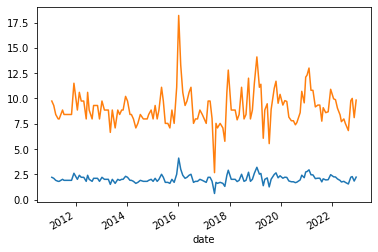

In [18]:
pivoted_df["nitrate_nitrogen(mgN/l)"].plot()
pivoted_df["nitrate(mg/l)"].plot()

In [29]:
pivoted_df["nitrate(mg/l)"].head(50)

date
2011-01-25 10:00:00     9.74
2011-02-22 10:18:00     9.30
2011-03-22 10:35:00     8.41
2011-04-26 10:30:00     7.97
2011-05-10 10:30:00     7.97
2011-06-27 08:20:00     8.85
2011-07-18 08:30:00     8.41
2011-08-09 10:50:00     8.41
2011-09-06 10:55:00     8.41
2011-10-04 10:20:00     8.41
2011-11-02 10:20:00     8.41
2011-12-06 09:40:00    11.50
2012-01-24 10:15:00     8.85
2012-02-21 10:00:00    10.60
2012-03-19 10:25:00     9.74
2012-04-24 10:15:00     9.74
2012-05-29 10:20:00     7.97
2012-06-18 11:41:00    10.60
2012-07-10 10:45:00     8.85
2012-08-21 09:55:00     7.97
2012-09-11 10:05:00     9.30
2012-10-02 10:30:00     9.30
2012-11-06 10:15:00     9.30
2012-12-04 10:35:00     7.97
2013-01-08 10:35:00     9.74
2013-02-12 10:15:00     8.85
2013-03-05 10:54:00     8.85
2013-04-09 10:40:00     8.85
2013-05-07 10:23:00     6.64
2013-06-04 12:55:00     8.85
2013-07-15 10:25:00     7.08
2013-08-21 10:15:00     8.85
2013-09-17 07:45:00     8.41
2013-10-15 12:30:00     8.85
2013-11-0

<AxesSubplot:xlabel='date'>

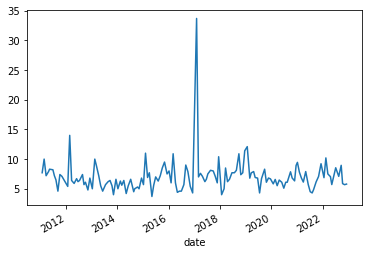

In [19]:
pivoted_df["chloride(mg/l)"].plot()

<AxesSubplot:xlabel='date'>

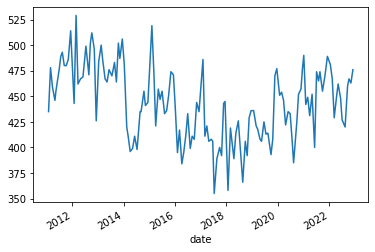

In [20]:
pivoted_df["electrical_conductivity(µS/cm)"].plot()

<AxesSubplot:xlabel='date'>

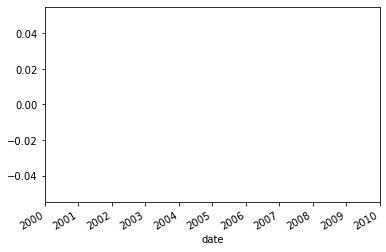

In [24]:
pivoted_df["aluminum_dissolved(µg/l)"].plot()

In [21]:
pivoted_df.loc[:, pivoted_df.columns]

,air_temperature(°C),aluminum_dissolved(µg/l),ammonium(mg/l),ammonium_nitrogen(mgN/l),arsenic_dissolved(µg/l),barium_dissolved(µg/l),benzene(µg/l),bod5(mg/l),boron_dissolved(µg/l),bromide(mg/l),...,1_2_4_trimethylbenzene(µg/l),1_2_dichlorobenzene(µg/l),1_2_dichloroethane(µg/l),1_2_dichloropropane(µg/l),1_3_5_trichlorobenzene(µg/l),1_3_5_trimethylbenzene(µg/l),1_3_dichlorobenzene(µg/l),1_3_dimethylaprobarbital(µg/l),1_4_dichlorobenzene(µg/l),1_4_dioxane(µg/l)
date,,,,,,,,,,,,,,,,,,,,,
2011-01-25 10:00:00,NaN,NaN,0.010,0.008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-22 10:18:00,NaN,NaN,0.010,0.008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-22 10:35:00,NaN,NaN,0.015,0.012,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-26 10:30:00,NaN,NaN,0.014,0.011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-10 10:30:00,NaN,NaN,0.030,0.023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-16 12:00:00,NaN,NaN,0.019,0.015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-20 12:00:00,NaN,NaN,0.031,0.024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-10 12:00:00,NaN,NaN,0.015,0.012,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations
- We have 76 stations in total from NAWA

# End